<b><center><h3>Author : Nilay Kushawaha</h3></center></b>
<center><u><h3>Task 7: Stock Market Prediction using
Numerical and Textual Analysis</h3></u></center>
<h3>Objective : </h3>   


*   Create a hybrid model for stock price/performance
prediction using numerical analysis of historical stock prices, and
sentimental analysis of news headlines


<font color='green'><center><h3>GRIP @ THE SPARKS FOUNDATION</h3></center></font>
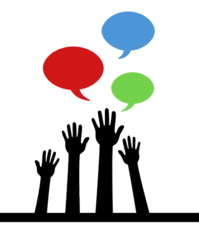


In [1]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 15.7 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
pip install -U keras-tuner

     |████████████████████████████████| 98 kB 4.4 MB/s 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from kerastuner.tuners import RandomSearch
from textblob import TextBlob

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  if __name__ == '__main__':


In [4]:
#Collecting data from yahoo finance

#train data
df_data=yf.download('^BSESN', start='2016-01-04', end='2020-07-30')

[*********************100%***********************]  1 of 1 completed


In [5]:
print(f"The shape of train data{df_data.shape}")

The shape of train data(1122, 6)


In [6]:
df_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,26116.519531,26116.519531,25596.570312,25623.349609,25623.349609,9100
2016-01-05,25744.699219,25766.759766,25513.750000,25580.339844,25580.339844,10300
2016-01-06,25628.230469,25632.570312,25357.699219,25406.330078,25406.330078,13400
2016-01-07,25224.699219,25230.349609,24825.699219,24851.830078,24851.830078,11800
2016-01-08,24969.019531,25083.550781,24887.220703,24934.330078,24934.330078,15900
...,...,...,...,...,...,...
2020-07-23,37814.921875,38225.031250,37738.589844,38140.468750,38140.468750,19600
2020-07-24,37949.589844,38235.730469,37748.410156,38128.898438,38128.898438,19900
2020-07-27,38275.339844,38275.339844,37769.441406,37934.730469,37934.730469,18600


In [7]:
df_data=df_data[['Close']]
df_data

,Close
Date,
2016-01-04,25623.349609
2016-01-05,25580.339844
2016-01-06,25406.330078
2016-01-07,24851.830078
2016-01-08,24934.330078
...,...
2020-07-23,38140.468750
2020-07-24,38128.898438
2020-07-27,37934.730469


**Visulaization**

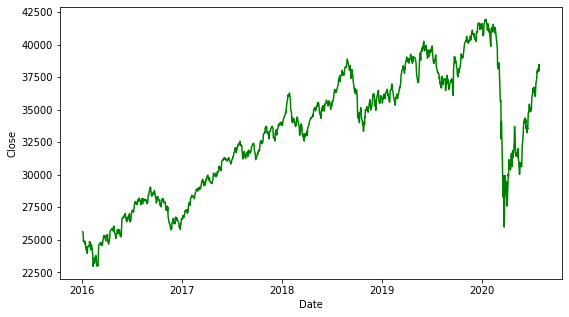

In [8]:
#Plotting the closing price

index=df_data.index
plt.figure(figsize=(9,5))
sns.lineplot(x=index,y=df_data['Close'],color='green')

**Data Pre-processing**

In [9]:
# Re-shaping the data
# df_data=df_data.reshape(-1,1)

In [10]:
# Scaling the data
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(df_data)

In [17]:
scaled_data

array([0.14060038])

In [11]:
#Splitting the data 
train_size=0.80
len_train_data=round(len(df_data)*train_size)
training_data=scaled_data[0:len_train_data]
testing_data=scaled_data[len_train_data:]
print(f'The shape of training data is : {training_data.shape}')
print(f'The shape of testing data is : {testing_data.shape}')

The shape of training data is : (898, 1)
The shape of testing data is : (224, 1)


In [12]:
#Creating features for future prediction

#We will use past 90 days data to predict the present
def feature_extraction(data,start,end):
  X_train=[]
  y_train=[]
  for i in range(start,end):
    X_train.append(data[i-50:i])
    y_train.append(data[i])
  return X_train,y_train

In [18]:
#Creating training data
X_train,y_train=feature_extraction(training_data,50,len(training_data))
#creating testing data
X_test,y_test=feature_extraction(testing_data,50,len(testing_data))

In [21]:
#Converting the list to numpy array
#Training data
X_train=np.array(X_train)
y_train=np.array(y_train)
#Testing data
X_test=np.array(X_test)
y_test=np.array(y_test)

In [15]:
print(f'The shape of X_train is {X_train.shape}')
print(f'The shape of y_train is {y_train.shape}')

print(f'The shape of X test is {X_test.shape}')
print(f'The shape of y test is {y_test.shape}')

The shape of X_train is (848, 50, 1)
The shape of y_train is (848, 1)
The shape of X test is (174, 50, 1)
The shape of y test is (174, 1)


In [46]:
#Creating X train DataFrame
#In order to get the original value we should inverse transform the scaled data
# We inverse transform here because we will later use it for visualization
train_df=pd.DataFrame(scaler.inverse_transform(X_train.reshape(-1,50)),index=np.arange(0,len(X_train)))
train_df['target']=scaler.inverse_transform(y_train)
train_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,target
0,25623.349609,25580.339844,25406.330078,24851.830078,24934.330078,24825.039062,24682.029297,24854.109375,24772.970703,24455.039062,24188.369141,24479.839844,24062.039063,23962.210937,24435.660156,24485.949219,24492.390625,24469.570312,24870.689453,24824.830078,24539.000000,24223.320312,24338.429688,24616.970703,24287.419922,24020.980469,23758.900391,22951.830078,22986.119141,23554.119141,23191.970703,23381.869141,23649.220703,23709.150391,23788.789062,23410.179688,23088.929688,22976.000000,23154.300781,23002.000000,23779.349609,24242.980469,24606.990234,24646.480469,24659.230469,24793.960938,24623.339844,24717.990234,24804.279297,24551.169922,24682.480469
1,25580.339844,25406.330078,24851.830078,24934.330078,24825.039062,24682.029297,24854.109375,24772.970703,24455.039062,24188.369141,24479.839844,24062.039063,23962.210937,24435.660156,24485.949219,24492.390625,24469.570312,24870.689453,24824.830078,24539.000000,24223.320312,24338.429688,24616.970703,24287.419922,24020.980469,23758.900391,22951.830078,22986.119141,23554.119141,23191.970703,23381.869141,23649.220703,23709.150391,23788.789062,23410.179688,23088.929688,22976.000000,23154.300781,23002.000000,23779.349609,24242.980469,24606.990234,24646.480469,24659.230469,24793.960938,24623.339844,24717.990234,24804.279297,24551.169922,24682.480469,24677.369141
2,25406.330078,24851.830078,24934.330078,24825.039062,24682.029297,24854.109375,24772.970703,24455.039062,24188.369141,24479.839844,24062.039063,23962.210937,24435.660156,24485.949219,24492.390625,24469.570312,24870.689453,24824.830078,24539.000000,24223.320312,24338.429688,24616.970703,24287.419922,24020.980469,23758.900391,22951.830078,22986.119141,23554.119141,23191.970703,23381.869141,23649.220703,23709.150391,23788.789062,23410.179688,23088.929688,22976.000000,23154.300781,23002.000000,23779.349609,24242.980469,24606.990234,24646.480469,24659.230469,24793.960938,24623.339844,24717.990234,24804.279297,24551.169922,24682.480469,24677.369141,24952.740234
3,24851.830078,24934.330078,24825.039062,24682.029297,24854.109375,24772.970703,24455.039062,24188.369141,24479.839844,24062.039063,23962.210937,24435.660156,24485.949219,24492.390625,24469.570312,24870.689453,24824.830078,24539.000000,24223.320312,24338.429688,24616.970703,24287.419922,24020.980469,23758.900391,22951.830078,22986.119141,23554.119141,23191.970703,23381.869141,23649.220703,23709.150391,23788.789062,23410.179688,23088.929688,22976.000000,23154.300781,23002.000000,23779.349609,24242.980469,24606.990234,24646.480469,24659.230469,24793.960938,24623.339844,24717.990234,24804.279297,24551.169922,24682.480469,24677.369141,24952.740234,25285.369141
4,24934.330078,24825.039062,24682.029297,24854.109375,24772.970703,24455.039062,24188.369141,24479.839844,24062.039063,23962.210937,24435.660156,24485.949219,24492.390625,24469.570312,24870.689453,24824.830078,24539.000000,24223.320312,24338.429688,24616.970703,24287.419922,24020.980469,23758.900391,22951.830078,22986.119141,23554.119141,23191.970703,23381.869141,23649.220703,23709.150391,23788.789062,23410.179688,23088.929688,22976.000000,23154.300781,23002.000000,23779.349609,24242.980469,24606.990234,24646.480469,24659.230469,24793.960938,24623.339844,24717.990234,24804.279297,24551.169922,24682.480469,24677.369141,24952.740234,25285.369141,25330.490234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,39784.519531,39950.460937,39756.808594,39741.359375,39452.070312,38960.789062,39046.339844,39112.738281,39601.628906,39194.488281,39122.960938,39434.941406,39592.078125,39586.410156,39394.640625,39686.500000,39816.480469,39839.250000,39908.058594,39513.390625,38720.570313,38730.820312,38557.039062,38823.109375,387

In [47]:
#Creating X test DataFrame
test_df=pd.DataFrame(scaler.inverse_transform(X_test.reshape(-1,50)),index=np.arange(len(X_train),len(X_train)+len(X_test)))
test_df['target']=scaler.inverse_transform(y_test)
test_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,target
848,37451.839844,37068.929688,37332.789062,36562.910156,36724.738281,36644.421875,36981.769531,37145.449219,37270.820312,37104.281250,37384.988281,37123.308594,36481.089844,36563.878906,36093.468750,38014.621094,39090.031250,39097.140625,38593.519531,38989.738281,38822.570312,38667.328125,38305.410156,38106.871094,37673.308594,37531.980469,38177.949219,37880.398438,38127.078125,38214.468750,38506.089844,38598.988281,39052.058594,39298.378906,38963.839844,39058.828125,39020.390625,39058.058594,39831.839844,40051.871094,40129.050781,40165.031250,40301.960938,40248.230469,40469.781250,40653.738281,40323.609375,40345.078125,40116.058594,40286.480469,40356.691406
849,37068.929688,37332.789062,36562.910156,36724.738281,36644.421875,36981.769531,37145.449219,37270.820312,37104.281250,37384.988281,37123.308594,36481.089844,36563.878906,36093.468750,38014.621094,39090.031250,39097.140625,38593.519531,38989.738281,38822.570312,38667.328125,38305.410156,38106.871094,37673.308594,37531.980469,38177.949219,37880.398438,38127.078125,38214.468750,38506.089844,38598.988281,39052.058594,39298.378906,38963.839844,39058.828125,39020.390625,39058.058594,39831.839844,40051.871094,40129.050781,40165.031250,40301.960938,40248.230469,40469.781250,40653.738281,40323.609375,40345.078125,40116.058594,40286.480469,40356.691406,40284.191406
850,37332.789062,36562.910156,36724.738281,36644.421875,36981.769531,37145.449219,37270.820312,37104.281250,37384.988281,37123.308594,36481.089844,36563.878906,36093.468750,38014.621094,39090.031250,39097.140625,38593.519531,38989.738281,38822.570312,38667.328125,38305.410156,38106.871094,37673.308594,37531.980469,38177.949219,37880.398438,38127.078125,38214.468750,38506.089844,38598.988281,39052.058594,39298.378906,38963.839844,39058.828125,39020.390625,39058.058594,39831.839844,40051.871094,40129.050781,40165.031250,40301.960938,40248.230469,40469.781250,40653.738281,40323.609375,40345.078125,40116.058594,40286.480469,40356.691406,40284.191406,40469.699219
851,36562.910156,36724.738281,36644.421875,36981.769531,37145.449219,37270.820312,37104.281250,37384.988281,37123.308594,36481.089844,36563.878906,36093.468750,38014.621094,39090.031250,39097.140625,38593.519531,38989.738281,38822.570312,38667.328125,38305.410156,38106.871094,37673.308594,37531.980469,38177.949219,37880.398438,38127.078125,38214.468750,38506.089844,38598.988281,39052.058594,39298.378906,38963.839844,39058.828125,39020.390625,39058.058594,39831.839844,40051.871094,40129.050781,40165.031250,40301.960938,40248.230469,40469.781250,40653.738281,40323.609375,40345.078125,40116.058594,40286.480469,40356.691406,40284.191406,40469.699219,40651.640625
852,36724.738281,36644.421875,36981.769531,37145.449219,37270.820312,37104.281250,37384.988281,37123.308594,36481.089844,36563.878906,36093.468750,38014.621094,39090.031250,39097.140625,38593.519531,38989.738281,38822.570312,38667.328125,38305.410156,38106.871094,37673.308594,37531.980469,38177.949219,37880.398438,38127.078125,38214.468750,38506.089844,38598.988281,39052.058594,39298.378906,38963.839844,39058.828125,39020.390625,39058.058594,39831.839844,40051.871094,40129.050781,40165.031250,40301.960938,40248.230469,40469.781250,40653.738281,40323.609375,40345.078125,40116.058594,40286.480469,40356.691406,40284.191406,40469.699219,40651.640625,40575.171875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,32008.609375,31122.890625,31097.730469,30028.980469,30196.169922,30818.609375,30932.900391,30672.589844,30609.300781,31605.220703,32200.589844,32424.099609,33303.519531,33825.531250,34109.539062,33980.699219,34287.238281,34370.578125,33956.691406,34247.050781,33538.371094,33780.890625,33228.800781,33605

**Building model**

In [ ]:
#Now let us try to find the best model
#Hypertuning the LSTM model

#Adding LSTM layers

# def build_model(hp):
#   model=keras.Sequential()
#   model.add(keras.layers.LSTM(units=hp.Int('units',min_value=32,max_value=512,step=32),
#                                            return_sequences=True,input_shape=(X_train.shape[1],1)))
#   for i in range(hp.Int('layers',min_value=2,max_value=5)):
#     model.add(keras.layers.LSTM(units=hp.Int('units '+str(i),min_value=32,max_value=512,step=32),
#                                              return_sequences=True))

#   #Adding dense layers
#   model.add(keras.layers.Dense(units=1,activation="sigmoid"))
#   #Compiling the model
#   model.compile(optimizer='adam',loss='mean_squared_error')
#   return model

# tuner = RandomSearch(
#     build_model,
#     objective='val_mean_squared_error',
#     max_trials=5,
#     executions_per_trial=2,
#     directory='my_dir',
#     project_name='test'
#     )

# tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))
# tuner.results_summary()

Here we are using sigmoid function in the final layer because we want our final output to be b/w 0 and 1 so that we can then inverse tranform it and get the actual value. Since I have normalised the data between 0 and 1 so using a sigmoid function gives more accuracy then using no activation function

In [83]:
#Final model


model=keras.Sequential()
model.add(keras.layers.LSTM(units=384,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(keras.layers.LSTM(units=384,return_sequences=True))
model.add(keras.layers.LSTM(units=384,return_sequences=True))
model.add(keras.layers.LSTM(units=384,return_sequences=False))
model.add(keras.layers.Dense(units=1,activation="sigmoid"))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 50, 384)           592896    
                                                                 
 lstm_21 (LSTM)              (None, 50, 384)           1181184   
                                                                 
 lstm_22 (LSTM)              (None, 50, 384)           1181184   
                                                                 
 lstm_23 (LSTM)              (None, 384)               1181184   
                                                                 
 dense_8 (Dense)             (None, 1)                 385       
                                                                 
Total params: 4,136,833
Trainable params: 4,136,833
Non-trainable params: 0
_________________________________________________________________


In [84]:
model.compile(optimizer='adam',loss='mse')
callback_chk=keras.callbacks.ModelCheckpoint(filepath='best_model.h5',save_best_only=True)
model_history=model.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test),callbacks=[callback_chk])

Epoch 1/30
27/27 [==============================] - 12s 170ms/step - loss: 0.0215 - val_loss: 0.0284
Epoch 2/30
27/27 [==============================] - 3s 98ms/step - loss: 0.0025 - val_loss: 0.0212
Epoch 3/30
27/27 [==============================] - 3s 98ms/step - loss: 0.0017 - val_loss: 0.0176
Epoch 4/30
27/27 [==============================] - 3s 98ms/step - loss: 0.0017 - val_loss: 0.0142
Epoch 5/30
27/27 [==============================] - 3s 98ms/step - loss: 0.0014 - val_loss: 0.0126
Epoch 6/30
27/27 [==============================] - 3s 98ms/step - loss: 0.0011 - val_loss: 0.0107
Epoch 7/30
27/27 [==============================] - 3s 99ms/step - loss: 0.0011 - val_loss: 0.0092
Epoch 8/30
27/27 [==============================] - 2s 93ms/step - loss: 0.0011 - val_loss: 0.0095
Epoch 9/30
27/27 [==============================] - 2s 93ms/step - loss: 0.0012 - val_loss: 0.0093
Epoch 10/30
27/27 [==============================] - 3s 98ms/step - loss: 0.0011 - val_loss: 0.0074
Epoch 1

In [85]:
model=keras.models.load_model('best_model.h5')

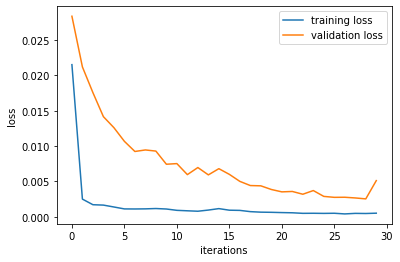

In [86]:
#Plotting the losses

loss=model_history.history['loss']
val_loss=model_history.history['val_loss']
index=np.arange(30)
sns.lineplot(x=index,y=loss)
sns.lineplot(x=index,y=val_loss)
plt.ylabel('loss')
plt.xlabel('iterations')
plt.legend(['training loss','validation loss'])

**Making predictions**

In [87]:
#Lets try to predict with some data 

predictions=model.predict(X_test)

In [88]:
predictions.shape

(174, 1)

In [89]:
#Performing inverse transformation on predictions and actual value

predictions_inv=scaler.inverse_transform(predictions)
y_test_inv=scaler.inverse_transform(y_test)

In [90]:
#RMSE

rmse_error=np.sqrt(np.mean(pow((predictions_inv-y_test_inv),2)))
rmse_error

956.1756966205292

In [91]:
# R squared
from sklearn.metrics import r2_score
r2_score(y_test_inv,predictions_inv)
#Adjusted R square
# print(1-(1-r2_score(y_test_inv, predictions_inv))*((len(X_test)-1)/(len(X_test)-len(X_test.columns)-1)))

0.9544955710525744

**Graphical analysis**

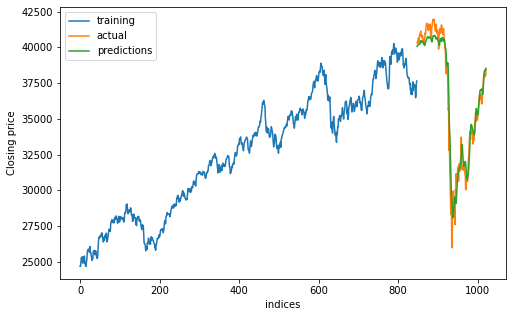

In [92]:
#Plotting the training data,testing data and predicted data
plt.figure(figsize=(8,5))
train_df['target'].plot()
test_df['target'].plot()
test_df['predictions']=predictions_inv
test_df['predictions'].plot()
plt.xlabel('indices')
plt.ylabel('Closing price')
plt.legend(['training','actual','predictions'])
plt.show()

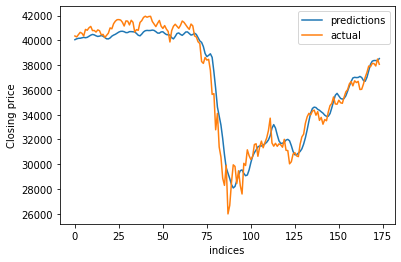

In [93]:
#Zooming the predictions portion

plt.plot(predictions_inv)
plt.plot(y_test_inv)
plt.legend(['predictions','actual'])
plt.xlabel('indices')
plt.ylabel('Closing price')
plt.show()

<h1>Textual analysis of news report

In [ ]:
df_news=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stock prediction news/india-news-headlines.csv')

In [ ]:
df_news.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [ ]:
#Converting the publish date data type to date time
df_news['Date']=pd.to_datetime(df_news['publish_date'],format='%Y%m%d')
df_news.drop(columns='publish_date',inplace=True)

In [ ]:
df_news

,headline_category,headline_text,Date
0,unknown,Status quo will not be disturbed at Ayodhya; s...,2001-01-02
1,unknown,Fissures in Hurriyat over Pak visit,2001-01-02
2,unknown,America's unwanted heading for India?,2001-01-02
3,unknown,For bigwigs; it is destination Goa,2001-01-02
4,unknown,Extra buses to clear tourist traffic,2001-01-02
...,...,...,...
3424062,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...,2020-12-31
3424063,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...,2020-12-31
3424064,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...,2020-12-31
3424065,removed,Govt extends deadline for use of FASTag till F...,2020-12-31


In [ ]:
#How Textblob works
test='I am a not very good boy'
TextBlob(test).sentiment

Sentiment(polarity=-0.26923076923076916, subjectivity=0.46153846153846156)

In [ ]:
#Fucntions to obtain polarity and subjectivity from the text
def polarity(text):
  pol_val=TextBlob(text).sentiment.polarity
  return pol_val
def subjectivity(text):
  sub_val=TextBlob(text).sentiment.subjectivity
  return sub_val

In [ ]:
df_news['polarity']=df_news['headline_text'].apply(polarity)
df_news['subjectivity']=df_news['headline_text'].apply(subjectivity)

In [ ]:
# Function for Sentiment analysis
def sentiment_analysis(polarity_val):
  if polarity_val>0:
    senti_val='Positive'
  elif polarity_val==0:
    senti_val="Neutral"
  else:
    senti_val='Negative'
  return senti_val

In [ ]:
df_news['Sentiment']=df_news['polarity'].apply(sentiment_analysis)

In [ ]:
df_news

,headline_category,headline_text,Date,polarity,Sentiment
0,unknown,Status quo will not be disturbed at Ayodhya; s...,2001-01-02,0.000000,Neutral
1,unknown,Fissures in Hurriyat over Pak visit,2001-01-02,0.000000,Neutral
2,unknown,America's unwanted heading for India?,2001-01-02,0.000000,Neutral
3,unknown,For bigwigs; it is destination Goa,2001-01-02,0.000000,Neutral
4,unknown,Extra buses to clear tourist traffic,2001-01-02,0.050000,Positive
...,...,...,...,...,...
3424062,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...,2020-12-31,0.500000,Positive
3424063,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...,2020-12-31,0.500000,Positive
3424064,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...,2020-12-31,0.500000,Positive
3424065,removed,Govt extends deadline for use of FASTag till F...,2020-12-31,0.000000,Neutral


In [ ]:
#Dropping duplicate rows
df_news.drop_duplicates(inplace=True)

In [ ]:
df_news.reset_index(inplace=True)

In [ ]:
df_news.drop(columns='index',inplace=True)

In [ ]:
# Printing some Positive,Negative and Neutral text
#Positive
count=0
for i in range(0,50):
  if df_news['Sentiment'][i]=='Positive':
    print(str(count)+"  " +df_news['headline_text'][i])
    count+=1

0  Extra buses to clear tourist traffic
1  Will Qureshi's return really help the govt?
2  Come to Nandi Hills...and you can fly
3  HAL approached for super jumbo project
4  The best music of the year
5  Planning Dept seeks Rs 350 crore more
6  More engg colleges if needed in state: Govt
7  Akki-Alur and Ranebennur peaceful


In [ ]:
#Negtaive
count=0
for i in range(0,50):
  if df_news['Sentiment'][i]=='Negative':
    print(str(count)+"  " +df_news['headline_text'][i])
    count+=1

0  Destroying myths and doubts on sexuality


In [ ]:
#Neutral
count=0
for i in range(0,50):
  if df_news['Sentiment'][i]=='Neutral':
    print(str(count)+"  " +df_news['headline_text'][i])
    count+=1

0  Status quo will not be disturbed at Ayodhya; says Vajpayee
1  Fissures in Hurriyat over Pak visit
2  America's unwanted heading for India?
3  For bigwigs; it is destination Goa
4  Dilute the power of transfers; says Riberio
5  Focus shifts to teaching of Hindi
6  IT will become compulsory in schools
7  Move to stop freedom fighters' pension flayed
8  Gilani claims he applied for passport 2 years ago
9  Parivar dismisses PM's warning
10  India; Pak exchange lists of N-plants
11  PM's tacit message: Put Ram tample on hold
12  Text of the Prime Minister's article
13  NCW to focus on violence against women
14  BBC's reality TV will focus on AIIMS
15  Jaitley firm on legal reforms
16  Hoshangabad farmers have enough water
17  BJP jumps into rail track conversion issue
18  State may take AP to court over Krishna
19  This official has sued the briber
20  Park turns temple compound as residents watch
21  Moves afoot to evict squatters in Urban dist
22  Mafia calls the shots in Gandhinagar t

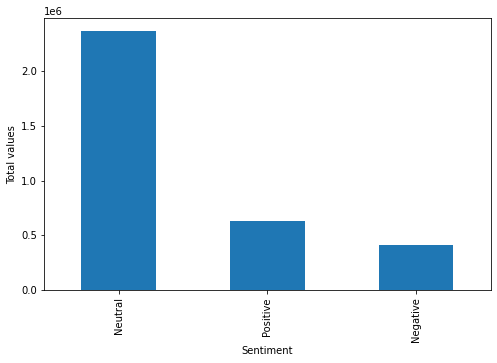

In [ ]:
#Visualizing the number of Poitive,Negative and Neutral classes
plt.figure(figsize=(8,5))
plt.xlabel('Sentiment')
plt.ylabel('Total values')
df_news['Sentiment'].value_counts().plot(kind='bar')

In [ ]:
# Merging the stocks dataframe and the news dataframe on date column
df_final=pd.merge(df_news,df_data,on="Date",how='right')

In [ ]:
df_final

,headline_category,headline_text,Date,polarity,Sentiment,Close
0,life-style.health-fitness.fitness,Surprising facts about exercise sweat,2016-01-04,0.700000,Positive,25623.349609
1,life-style.health-fitness.home-remedies,Bizarre home remedies for the common cold,2016-01-04,-0.166667,Negative,25623.349609
2,life-style.beauty,How to wear makeup when you're 30,2016-01-04,0.000000,Neutral,25623.349609
3,life-style.relationships.parenting,What's your style?,2016-01-04,0.000000,Neutral,25623.349609
4,life-style.relationships.man-woman,Bizarre reasons Indians cite for divorce,2016-01-04,0.400000,Positive,25623.349609
...,...,...,...,...,...,...
702348,city.delhi,AAP-BJP row over corpn taxes spills on to streets,2020-07-29,0.000000,Neutral,38071.128906
702349,city.delhi,Nearly 3L job seekers register on portal,2020-07-29,0.100000,Positive,38071.128906
702350,city.delhi,Covid Duty: Hotels Allowed To Check Out,2020-07-29,0.000000,Neutral,38071.128906
702351,city.nagpur,Cadasta Foundation; Waatavaran to secure fores...,2020-07-29,0.400000,Positive,38071.128906


In [ ]:
# Grouping
df_final.groupby('Sentiment')['Close'].mean()

Sentiment
Negative    32869.248913
Neutral     32593.546908
Positive    32649.965569
Name: Close, dtype: float64

In [ ]:
#Creting dummy variables for sentiment column
df_final=pd.get_dummies(data=df_final,columns=['Sentiment'])

In [ ]:
df_final.head(2)

,headline_category,headline_text,Date,polarity,Close,Sentiment_Negative,Sentiment_Neutral,Sentiment_Positive
0,life-style.health-fitness.fitness,Surprising facts about exercise sweat,2016-01-04,0.700000,25623.349609,0,0,1
1,life-style.health-fitness.home-remedies,Bizarre home remedies for the common cold,2016-01-04,-0.166667,25623.349609,1,0,0


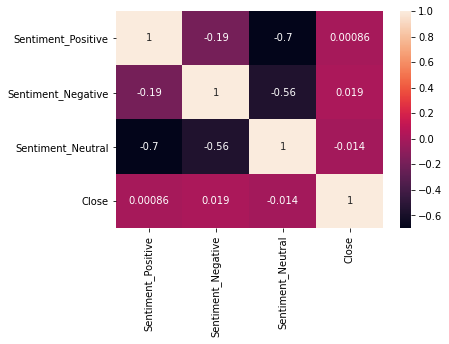

In [ ]:
# Plotting Correlation  Matrix
corr_data=df_final[['Sentiment_Positive','Sentiment_Negative','Sentiment_Neutral','Close']].corr()
sns.heatmap(corr_data,annot=True)

<h1>Conclusion</h1> <h3>We can finally conclude that the Stock prices are somewhat negatively correlated with the sentiment of the news headlines. 